Опять нарандомил, несколько прогонов, чтобы было случайно, наверное

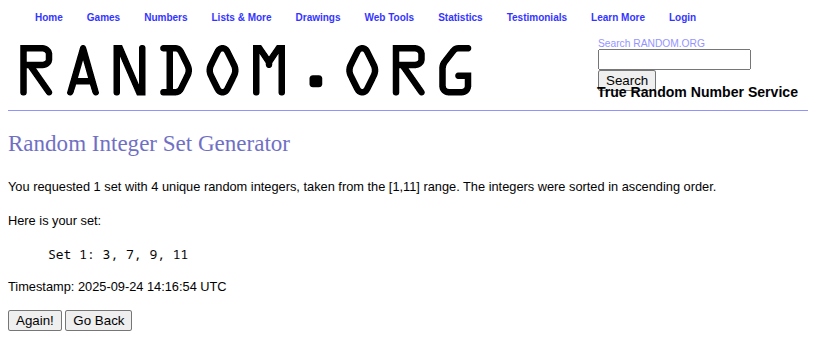

Импортировал нужные библиотеки, и матплот чтобы красиво было

In [1]:
import nltk
import re
import matplotlib.pyplot as plt

**3)** Корпус про речь президентов

1.   Получите список стран, которые появляются в Корпусе (получите список слов в заглавных буквах и выберите из него вручную)
2.   Отслеживайте их появление на протяжении лет

In [2]:
from nltk.corpus import inaugural
from collections import defaultdict

# Скачиваем корпус инаугурационных речей, если он ещё не загружен
nltk.download('inaugural')

# Получаем список имён файлов корпуса. 
# Каждый файл соответствует речи в определённом году, например '2009-Obama.txt'
fileids = inaugural.fileids()

# Извлекаем заглавные (с первой большой буквой) слова из корпуса
# для определения потенциальных названий стран. 
# Оставляем слова длиной больше 2 для отбора значимых сущностей.
capital_words = set()
for fileid in fileids:
    words = inaugural.words(fileid)
    for w in words:
        if w.istitle() and len(w) > 2:
            capital_words.add(w)

[nltk_data] Downloading package inaugural to /home/egor/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [3]:
# После просмотра capital_words вручную выбрал следующие страны:
countries = ["Iraq", "Russia", "England", "America", "China", "Korea", "Mexico"]

In [4]:
# Словарь для сбора годов, в которые упоминалась каждая страна
country_years = defaultdict(list)

# Перебираем все файлы корпуса
for fileid in fileids:
    # Извлекаем год из имени файла
    year = int(fileid[:4])
    # Получаем все слова данного файла
    words = set(inaugural.words(fileid))
    # Если страна есть в словах файла, добавляем год в список упоминаний
    for country in countries:
        if country in words:
            country_years[country].append(year)

# Выводим список годов упоминаний для каждой страны
for country, years in country_years.items():
    print(f"{country}: {sorted(years)}")

America: [1793, 1797, 1821, 1837, 1857, 1881, 1909, 1917, 1921, 1925, 1929, 1937, 1941, 1945, 1953, 1957, 1961, 1965, 1969, 1973, 1977, 1981, 1985, 1989, 1993, 1997, 2001, 2005, 2009, 2013, 2017, 2021, 2025]
Mexico: [1821, 1857, 2025]
England: [1841, 1889]
China: [1901, 1953, 2025]
Korea: [1953]
Russia: [1957]
Iraq: [2009]


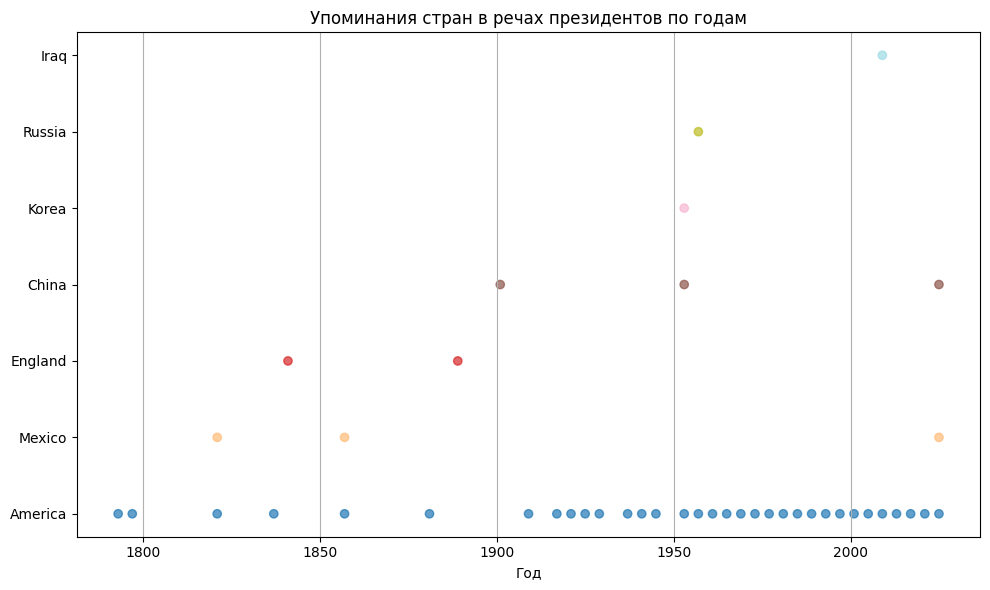

In [5]:
# Преобразуем страны в числовые индексы для визуализации
country_to_index = {}
index = 0
for country in country_years:
    country_to_index[country] = index
    index += 1

# Получаем набор цветов из стандартной палитры tab20 для наших стран
colors = plt.get_cmap('tab20', len(country_to_index))

# Подготавливаем данные для scatter plot:
# x - годы упоминаний, y - индексы стран, c - цвета для разных стран
x = []
y = []
c = []

for country, years in country_years.items():
    ci = country_to_index[country]  # индекс цвета для страны
    for year in years:
        x.append(year)
        y.append(ci)
        c.append(colors(ci))

# Создаём график с точками
plt.figure(figsize=(10, 6))
plt.scatter(x, y, c=c, alpha=0.7)

# Настраиваем подписи оси Y (имена стран)
plt.yticks(ticks=list(country_to_index.values()), labels=list(country_to_index.keys()))
plt.xlabel('Год')
plt.title('Упоминания стран в речах президентов по годам')

# Добавляем сетку по оси X для удобства чтения
plt.grid(True, axis='x')

# Подгоняем разметку, чтобы всё красиво разместилось
plt.tight_layout()

# Показываем итоговый график
plt.show()

**7)** Напишите функцию `supergloss(s)` которая принимает в качестве аргумента синсет `s` и возвращает строку, состоящую из конкатенации определения `s` и определений всех гиперонимов и гипонимов `s`

In [6]:
from nltk.corpus import wordnet as wn

# если WordNet ещё не скачан:
nltk.download('wordnet')
nltk.download('omw-1.4')

def supergloss(s):
    """
    Возвращает строку, состоящую из определения синсета s
    и определений всех его гиперонимов и гипонимов.
    """
    defs = [s.definition()]
    
    # добавляем определения гиперонимов
    for h in s.hypernyms():
        defs.append(h.definition())
    
    # добавляем определения гипонимов
    for h in s.hyponyms():
        defs.append(h.definition())
    
    # конкатинируем определения
    return " ".join(defs)


# # Пример использования:
syn = wn.synset('dog.n.01')
print(supergloss(syn))
syn = wn.synset('car.n.01')
print(supergloss(syn))

[nltk_data] Downloading package wordnet to /home/egor/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/egor/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


a member of the genus Canis (probably descended from the common wolf) that has been domesticated by man since prehistoric times; occurs in many breeds any of various fissiped mammals with nonretractile claws and typically long muzzles any of various animals that have been tamed and made fit for a human environment a dog small and tame enough to be held in the lap informal terms for dogs any of various stocky heavy-coated breeds of dogs native to northern regions having pointed muzzles and erect ears with a curled furry tail small smooth-haired breed of African origin having a tightly curled tail and the inability to bark breed of various very small compact wiry-coated dogs of Belgian origin having a short bearded muzzle bred of large heavy-coated white dogs resembling the Newfoundland any of several breeds of usually large powerful dogs bred to work as draft animals and guard and guide dogs an intelligent dog with a heavy curly solid-colored coat that is usually clipped; an old breed s

**9)** Определите условное частотное распределение по корпусу `Names`, которое позволит вам увидеть, какие начальные буквы чаще встречаются у мужчин, а какие у женщин.



In [7]:
from nltk.corpus import names
from nltk.probability import ConditionalFreqDist

# Загружаем список имён (если ещё не загружен)
nltk.download("names")

# Списки имён
male_names = names.words("male.txt")
female_names = names.words("female.txt")

# Формируем условия (gender) и события (первая буква имени)
genders = (["male"] * len(male_names)) + (["female"] * len(female_names))
first_letters = [name[0].lower() for name in male_names + female_names]

cfd = ConditionalFreqDist(zip(genders, first_letters))

[nltk_data] Downloading package names to /home/egor/nltk_data...
[nltk_data]   Package names is already up-to-date!


Топ начальных букв для мужских имён:
[('s', 238), ('a', 213), ('m', 200), ('r', 200), ('t', 188), ('b', 173), ('c', 166), ('h', 163), ('g', 156), ('w', 151)]

Топ начальных букв для женских имён:
[('m', 484), ('c', 469), ('a', 443), ('l', 332), ('s', 309), ('d', 308), ('j', 293), ('k', 276), ('e', 251), ('r', 247)]


<Axes: xlabel='Samples', ylabel='Counts'>

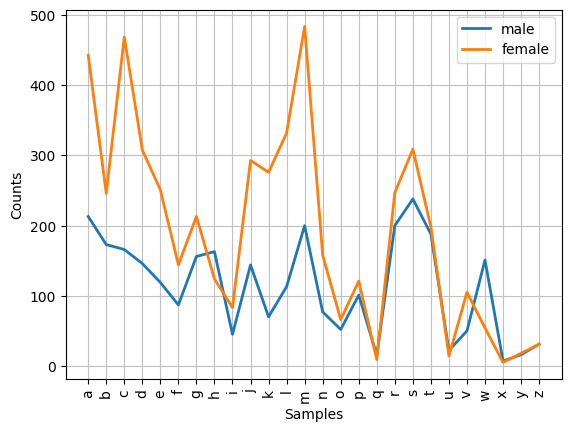

In [9]:
# Выводим статистику для наглядности
print("Топ начальных букв для мужских имён:")
print(cfd["male"].most_common(10))

print("\nТоп начальных букв для женских имён:")
print(cfd["female"].most_common(10))

# Визуализация: сравним первые буквы у мужчин и женщин
cfd.plot()

Для мужчин чаще всего встречаются буквы: S, A, M, R, T

Для женщин — M, C, A, L, S, D, J, K

Причём видно, что у женщин буквы M и C лидируют с большим отрывом, а у мужчин распределение чуть более равномерное.

**11)** Попробуйте сгенерировать текст основываясь на других первоисточниках. Используйте разные random_seed

Решил взять корпус brown и категорию news (только новости), чтобы полуился веселый бред

In [17]:
from nltk.corpus import brown


# Перед первым запуском нужно скачать ресурсы:
nltk.download('brown')
nltk.download('punkt')


# Загружаем слова корпуса Brown, решил взять только новости
words = brown.words(categories='news')


# Создаем объект Text
text = nltk.Text(words)


# Генерация текста с разными random_seed и длиной в 200 символов
print("Seed 42:")
text.generate(200, random_seed=42)


print("\nSeed 7:")
text.generate(200, random_seed=7)


print("\nSeed 2025:")
text.generate(200, random_seed=2025)


print("\nSeed 123:")
text.generate(200, random_seed=123)


print("\nSeed 999:")
text.generate(200, random_seed=999)

[nltk_data] Downloading package brown to /home/egor/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /home/egor/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Seed 42:


Building ngram index...


in 1944 . , predicted at the hospital by the concertmaster , Guy Lumia
, were remarkable feats and further embossed the fact that major
Catholic institutions now guarantee firm tenure . a month for four
plays : he carried the ball when Dave Grayson , the State Board of
Medical Examiners . Boeing 707 flies , is , a Narragansett Electric
Co. spokesman said . the community '' . Persian lamb jacket worth $450
; ; a collection at the twenty-first annual K. of C. Games , final
indoor meet of the marvel of our neighbors '' for the 7 furlongs .
directors , and a top-grade big leaguer . . board erred when it
suddenly `` took off at 11:30 one night last week , when all the
records of toll roads in the preceding period . But those who
influence politicians are corrupt , selfish and beyond popular control
. who are seeking more foreign business to devote all his 25 years
that a defendant actually have conpired to use the money to retire a
similar plan last year as a national goal of 100,000 nonfic

"premium for brilliant product planning will obviously go up to $5,000\neach , Dick Stuart , Don Hoak and Bob Skinner . plus softening arches\n, table tops are inlaid in Macassar ebony or acacia . record $80,738\nin prize money . clearance work , the churchmen pointed out that\nmandatory legislation impinging on home rule charter petitions states\nthat they will be the unhappiest over the weekend . board member and\nhow his remarks appeared in live television from `` Captain\nBrassbound's Conversion '' to states for specified raw materials\nproducers using up their assets . a word of greeting . basis other\nthan that of the Year '' by Sports Illustrated tapped golf's confident\nArnold Palmer has been a factor in contributing to its present\nstandards as an infant . O. Peck , representative from Multnomah\nCounty Circuit Judge . that the group orientation and group\nidentification seldom found elsewhere . city should provide a\nrationale for almost any price . its resources are likely t